In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
# Load the data

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [6]:
y.shape, tx.shape


((202,), (202, 2))

In [4]:
### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

IndentationError: unexpected indent (2194109721.py, line 2)

In [5]:
# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

SyntaxError: invalid syntax (3700976558.py, line 2)

In [7]:
import numpy as np

def compute_loss(y, tx, w):
    """Calculate the loss using Mean Squared Error (MSE).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        loss_by_MSE: The value of the loss (a scalar) calculated using MSE.
    """
    
    # Calculate the error (residuals) between actual y and predicted y using the given parameters w
    e = y - np.dot(tx, w)
    
    # Calculate the Mean Squared Error (MSE)
    #loss_by_MSE = np.mean(e**2) / 2.0  # Dividing by 2 is optional and simplifies the gradient computation
    
    # Calculate the Mean Absolute Error (MAE)
    loss_by_MAE = np.mean(np.abs(e))
    #return loss_by_MSE
    return loss_by_MAE

    


In [ ]:
# 2. Grid Search

In [ ]:
Fill in the function `grid_search()` below:

In [12]:
# from costs import *
import numpy as np

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """
    
    # Initialize the losses array
    losses = np.zeros((len(grid_w0), len(grid_w1)))

    # Iterate through each combination of w0 and w1
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            # Create the parameter vector w
            w = np.array([w0, w1])
            # Calculate the loss using the compute_loss function
            loss = compute_loss(y, tx, w)
            # Store the loss in the losses array
            losses[i, j] = loss
#We loop through each combination of `w0` and `w1` from the `grid_w0` and `grid_w1` arrays.
# For each combination, we create a parameter vector `w` containing `w0` and `w1`.
# We calculate the loss using the `compute_loss` function, passing in `y`, `tx`, and the `w` vector.
# We store the computed loss in the `losses` array at the corresponding indices.
# Finally, we return the `losses` array, which contains the loss values for each combination of `w0` and `w1`.


    return losses

In [ ]:
Let us play with the grid search demo now!

Grid Search: loss*=5.464204730460844, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.119 seconds


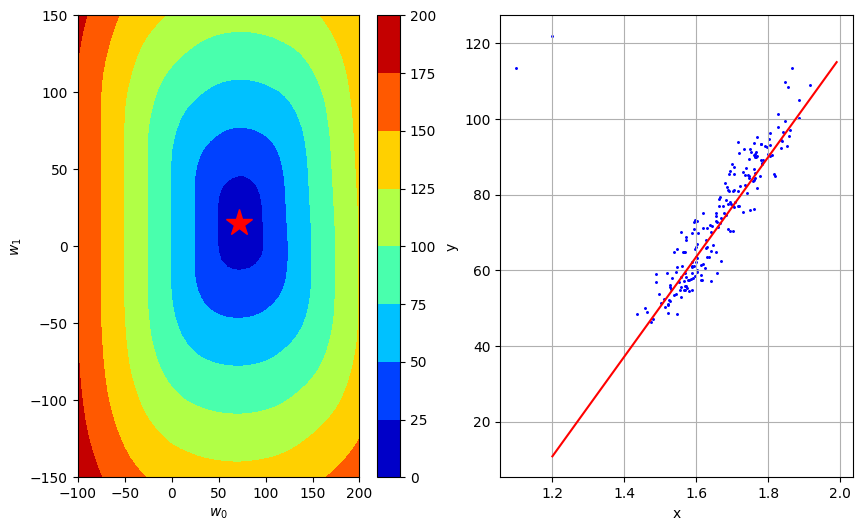

In [13]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization 
import datetime


# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

In [14]:
# 3. Gradient Descent

In [15]:
Again, please fill in the functions `compute_gradient` below:

SyntaxError: invalid syntax (2337745732.py, line 1)

In [38]:
import numpy as np

def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # Calculate the error
    e = y - np.dot(tx, w)
    
    # Calculate the gradient using the MSE formula
    gradient_of_loss = -(1 / len(y)) * np.dot(tx.T, e)
    
    return gradient_of_loss

# Define your data
wline = [0, 0]
y1 = np.array([12, 5])
tx1 = np.array([[1, 2], [1, 4]])
w = np.array(wline).reshape(-1, 1)

# Compute the gradient for w0 = 100 and w1 = 20
gradient_1 = compute_gradient(y1, tx1, w)

# Define new data
wline = [50, 10]
w = np.array(wline).reshape(-1, 1)

# Compute the gradient for w0 = 50 and w1 = 10
gradient_2 = compute_gradient(y1, tx1, w)

print("Gradient for w0 = 100 and w1 = 20:", gradient_1)
print("Gradient for w0 = 50 and w1 = 10:", gradient_2)


Gradient for w0 = 100 and w1 = 20: [[-12.  -5.]
 [-36. -15.]]
Gradient for w0 = 50 and w1 = 10: [[ 68.  75.]
 [214. 235.]]


In [ ]:
Please fill in the functions `gradient_descent` below:

In [37]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = []
    losses=[]
    w = initial_w
    for n_iter in range(max_iters):
        # Compute the gradient and loss
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)

        # Update w using the gradient and step size
        w = w - gamma * gradient

        # Store w and loss
        ws.append(w)
        losses.append(loss)
    
        # Print progress (optional)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws


In [ ]:
Test your gradient descent function through gradient descent demo shown below:

In [30]:
# from gradient_descent import *
from plots import gradient_descent_visualization
import datetime
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([1, 1])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

NameError: name 'gradient_descent' is not defined

In [29]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

NameError: name 'gd_ws' is not defined

In [ ]:
# 4. Stochastic gradient descent

In [18]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    
     # Calculate the error
    e = y - np.dot(tx, w)
    
    # Calculate the gradient using the MSE formula
    gradient_of_loss = -(1 / len(y)) * np.dot(tx.T, e)
    
    return gradient_of_loss
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************



def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            # Calculate the stochastic gradient for the current mini-batch
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            # Update the model parameters
            w = w- gamma * gradient #-= means w= w -gamma*gradient
            # Calculate and store the loss using compute_loss
            loss = compute_loss(y, tx, w)
            losses.append(loss)
            ws.append(w)
      
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [28]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 9

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=67.39244221332439, w0=6.675363641601992, w1=-1.9573257493229805
SGD iter. 1/49: loss=60.33946200206094, w0=13.728343852865434, w1=0.8064652140703901
SGD iter. 2/49: loss=54.16941841232441, w0=19.89838744260197, w1=2.3543046070264175
SGD iter. 3/49: loss=49.44043690828646, w0=24.62736894663992, w1=2.69059863350776
SGD iter. 4/49: loss=44.670361976322, w0=29.39744387860437, w1=4.551242202970572
SGD iter. 5/49: loss=39.879532922536534, w0=34.188272932389836, w1=7.521248764155291
SGD iter. 6/49: loss=35.99796035825474, w0=38.06984549667163, w1=7.651075793533608
SGD iter. 7/49: loss=33.02359329175888, w0=41.04421256316749, w1=7.249339264789991
SGD iter. 8/49: loss=29.236384484640727, w0=44.83142137028564, w1=9.90483618565868
SGD iter. 9/49: loss=26.15445922300619, w0=47.91334663192018, w1=11.190722084993055
SGD iter. 10/49: loss=23.870276808608782, w0=50.197529046317584, w1=11.60488296114633
SGD iter. 11/49: loss=21.544488127752214, w0=52.52331772717415, w1=12.766495290

In [56]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [ ]:
# 5. Effect of Outliers and MAE Cost Function

In [27]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************


x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [ ]:
y.shape, tx.shape

In [26]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************



end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

NotImplementedError: 

In [ ]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

In [ ]:
# 6. Subgradient descent

In [14]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        subgradient: A numpy array of shape (2, ) containing the subgradient of the MAE at w.
    """
    
    N = len(y)  # Number of data points
    
    # Calculate the error (residuals) between actual y and predicted y using the given parameters w
    e = y - np.dot(tx, w)
    
    # Compute the subgradient
    subgradient = np.zeros(w.shape)  # Initialize the subgradient vector
    
    for i in range(len(w)):
        subgradient[i] = (1 / N) * np.dot(-tx[:, i], np.sign(e))
    
    return subgradient

    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************

In [15]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # Compute loss and subgradient
        loss = compute_loss(y, tx, w)
        subgradient = compute_subgradient_mae(y, tx, w)
        
        # Update w by subgradient
        w = w- gamma * subgradient
        
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

        # TODO: update w by subgradient
        # ***************************************************

In [32]:
# Define the parameters of the algorithm.
max_iters = 20
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/19: loss=74.06780585492638, w0=0.7, w1=7.771561172376096e-16
SubGD iter. 1/19: loss=73.36780585492637, w0=1.4, w1=1.5543122344752192e-15
SubGD iter. 2/19: loss=72.66780585492637, w0=2.0999999999999996, w1=2.3314683517128287e-15
SubGD iter. 3/19: loss=71.96780585492637, w0=2.8, w1=3.1086244689504383e-15
SubGD iter. 4/19: loss=71.26780585492638, w0=3.5, w1=3.885780586188048e-15
SubGD iter. 5/19: loss=70.56780585492638, w0=4.2, w1=4.6629367034256575e-15
SubGD iter. 6/19: loss=69.86780585492637, w0=4.9, w1=5.440092820663267e-15
SubGD iter. 7/19: loss=69.16780585492639, w0=5.6000000000000005, w1=6.217248937900877e-15
SubGD iter. 8/19: loss=68.46780585492637, w0=6.300000000000001, w1=6.994405055138486e-15
SubGD iter. 9/19: loss=67.76780585492638, w0=7.000000000000001, w1=7.771561172376096e-15
SubGD iter. 10/19: loss=67.06780585492638, w0=7.700000000000001, w1=8.548717289613705e-15
SubGD iter. 11/19: loss=66.36780585492637, w0=8.4, w1=9.325873406851315e-15
SubGD iter. 12/19: los

In [33]:
from ipywidgets import IntSlider, interact
from plots import gradient_descent_visualization


def plot_figure(n_iter):
    fig =gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=21, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [ ]:
# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [40]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B, 2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            # Compute loss and subgradient for the current mini-batch
            minibatch_loss = compute_loss(minibatch_y, minibatch_tx, w)
            minibatch_subgradient = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
            # Update the model parameters
            w = w - gamma * minibatch_subgradient
            # Calculate and store the loss using compute_loss
            losses.append(minibatch_loss)
            ws.append(w)
            print(
                "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                    bi=n_iter, ti=max_iters - 1, l=minibatch_loss, w0=w[0], w1=w[1]
                )
            )

    return losses, ws


In [41]:
# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/99: loss=75.1876782867415, w0=0.7, w1=-0.24097991466664814
SubSGD iter. 1/99: loss=47.224644302326354, w0=1.4, w1=-1.5949368086998756
SubSGD iter. 2/99: loss=104.35047904455898, w0=2.0999999999999996, w1=-4.968080486289553
SubSGD iter. 3/99: loss=92.69173157798818, w0=2.8, w1=-4.353419505159167
SubSGD iter. 4/99: loss=58.299910966080915, w0=3.5, w1=-4.723687595687963
SubSGD iter. 5/99: loss=85.20272588007379, w0=4.2, w1=-4.21450175174171
SubSGD iter. 6/99: loss=84.02772152397833, w0=4.9, w1=-3.5833364117468576
SubSGD iter. 7/99: loss=65.8517412436227, w0=5.6000000000000005, w1=-3.982794184133436
SubSGD iter. 8/99: loss=95.70511613174972, w0=6.300000000000001, w1=-3.1035462182372644
SubSGD iter. 9/99: loss=58.47194520181801, w0=7.000000000000001, w1=-3.1288439836261057
SubSGD iter. 10/99: loss=91.00484484349234, w0=7.700000000000001, w1=-1.960513183108637
SubSGD iter. 11/99: loss=43.34915291296015, w0=8.4, w1=-2.937310662050556
SubSGD iter. 12/99: loss=85.67241274739152, 

In [42]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>